In [1]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

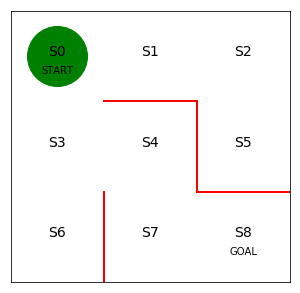

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [4]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수


def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [5]:
# 초기 정책 pi_0을 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [7]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다


def goal_maze_ret_s_a(pi):
    s = 0  # 시작 지점
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다.

        if next_s == 8:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다


In [10]:
# theta를 수정하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                # 초판에서 부호 오류가 있었음(수정일 : 1807030
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [11]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.50446417 0.         0.49553583]
 [0.         0.         0.49910714 0.50089286]
 [0.33293627 0.33412746 0.33293627 0.        ]
 [0.         0.         0.50089286 0.49910714]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49910714 0.50089286 0.         0.        ]]


In [12]:
# 정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-4  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi)  # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history)  # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 정책 π를 수정

    print(np.sum(np.abs(new_pi - pi)))  # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.048655064592875996
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009340903086827446
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다
0.012493427169397386
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.018271672938274752
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.010013717116012955
목표 지점에 이르기까지 걸린 단계 수는 42단계입니다
0.01510474454879851
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.01789731710307524
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.0075210561098427164
목표 지점에 이르기까지 걸린 단계 수는 54단계입니다
0.017556093431969344
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.014348778878454371
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다
0.012903873181221326
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.03172751817097841
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009306243379409551
목표 지점에 이르기까지 걸린 단계 수는 82단계입니다
0.021831277371802627
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01135646356164105
목표 지점에 이르기까지 걸린 단계 수는 84단계입니다
0.004115718893690334
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.008100991793018875
목표 지점에 이르기까지 걸린 단계 수는 68단계입니다
0.016593691034428204
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.01954848769304307
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.012186137917987727
목표 지점에 이르기까지 걸린 

0.023284106116726128
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014804118703516
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.009980940055252324
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01345440911202081
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.032039461363805866
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.01778751228745115
목표 지점에 이르기까지 걸린 단계 수는 48단계입니다
0.01531097591311631
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.03171206247904093
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.022808807924838248
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.0217260940591307
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.01293021937368713
목표 지점에 이르기까지 걸린 단계 수는 36단계입니다
0.01715177603302903
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.016376529778231036
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.012970384175553379
목표 지점에 이르기까지 걸린 단계 수는 42단계입니다
0.01696219248658512
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.031675214437113575
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.016616427624093655
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010594059366812292
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.024200497645818414
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.010160638277143919
목표 지점에 이르기까지 걸린 단계 수는 18단계입니

0.013820182223815328
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013765533569394056
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012938234760712097
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01327984048535498
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01092496039419956
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.010786884979383016
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.015290674023438963
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010764405305981911
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.016357997106942634
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01064743533995001
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.016564516943002497
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01714491398046665
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015485049156315864
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.016335208057075
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010796685249736565
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.01293685213134109
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013578661979553402
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012974261991615582
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.021458730548137447
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012847951686235093
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013

0.007508381038444159
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00657008743385204
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006604879524262627
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014240195386431329
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.004415097883575608
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0043760494049035065
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.007255335714831279
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0077430694158123065
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004399284193394581
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0043604633297556344
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004322127688734342
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0042842696102510375
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009822420043971325
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00789064443321362
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004303506946657987
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004265905621840552
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004228770043520125
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.011613142722824071
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004238385010417289
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004201581044727773
목표 지점에 이르기까지 걸린 단계 수는 4단계입

0.002065890263803008
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0020527918662441233
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002039813781092477
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0020269545801777852
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002014212855881721
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002001587220799385
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019890763073963508
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001976678767683586
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019643932728868746
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004529425584542265
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001971711185439519
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001959458951150031
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019473171629850045
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019352845328974438
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019233597910684047
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001911541685609676
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001899828982264394
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0018882204641229097
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001876714931334178
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00682901857766878
목표 지점에 이르기까지 걸린 단계 수는 

0.014436770028696068
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.0039984864303763135
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014323214552425662
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004962003082154096
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0014494591424632983
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0014414350829540512
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004375533051179756
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0014482425708969501
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0014402236140544297
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0014322700376908915
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.012802811971972104
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0014278256301620482
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0014199903900761826
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0014122184455027664
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0014045091274049737
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0013968617754119492
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0013892757376809048
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0013817503707744538
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004950091901638656
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0013979583627222042
목표 지점에 이르기까지 

0.003702057254544394
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010798777232884846
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003792782493633226
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010933476956395197
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010878540192408859
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.005730306757335692
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0011133087386728455
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0038900471979342807
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001127843808528671
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001122027875651764
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011162571824877773
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001110531261103033
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001104849649546616
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001099211891761126
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010936175374941168
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010880661422121712
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010825572670128472
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010770904785419033
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0010716653489120861
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001066281455619579
목표 지점에 이르기까지 걸린 단계

0.0032093124133449856
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0008054976770733718
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008019711980775113
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000798468059454497
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0007949880549446113
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0007915309805570821
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003246151040492095
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0008018673091694101
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0007983519575513291
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0007948599398182876
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0007913910489852176
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0007879450803533056
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.005565450835065766
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.000809486670040483
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000805914984362107
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000802367159137736
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0032896569696807855
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.000813084733119307
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008094754552396173
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008058904702653788
목표 지점에 이르기까지 걸린

0.0005517909886849116
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005497297566605108
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005476803492738269
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005456426748248998
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000543616642508047
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005416021624012925
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005395991454539562
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000537607503479625
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005356271491425389
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005336579959530387
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005316999582506456
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005297529512006856
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005278168907814733
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005258916937773035
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005239772777648755
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005220735611102603
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005201804629546801
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005182979032092201
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005164258025425229
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00051456408237616
목표 지점에 이르기까지 

0.00030748583844084076
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0026983787360824324
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0003142043631334593
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00031334518064572714
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003124895654051628
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00031163749747806224
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00031078895707044307
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000309943924527465
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00030910238033138304
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00030826430510255687
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00030742967959417056
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003065984846962154
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003057707014318435
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003049463109530068
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00030412529454787104
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00030330763362888813
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00030249330974178174
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003016823045572936
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003008745998743928
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003000701776152345


0.00022986261549220316
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022932135746579763
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022878203717308782
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001352232396421335
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0002299466096907024
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022940697201986535
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002288692569969962
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022833345541284356
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022779955810931646
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022726755598694373
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022673743999993
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0013768370458099033
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0002280282864022265
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022749725923947375
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002269681066062526
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002264408196148253
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022591538942768122
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022539180726202299
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000224870064385322
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00022435015211870815
목표

0.00019181142603124333
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001914082764554719
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019100640226103575
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019060579805195953
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019020645845970602
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018980837814587016
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001894115517984199
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018901597413473192
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000188621639899628
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018822854386549466
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001878366808325295
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001874460456278218
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001870566331065738
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018666843814972058
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018628145566673172
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018589568059132477
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003724827453085446
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0001870405220737864
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018665357207846116
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018626782533813675

0.00015065743336902665
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001503733811552034
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00015009013983039061
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001498077062845344
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014952607742121406
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014924525016138217
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014896522143784813
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014868598820078766
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014840754741282138
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011463735878364453
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00014957347789882475
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014929329602809613
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014901390758916867
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001174764748420017
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00015027710263468969
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014999561863291572
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014971493058861876
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001494350354854044
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001491559303200135
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00014887761210333

0.0001155407037967647
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011535161187228339
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011516298654188836
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001149748262633133
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011478712949945097
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011459989472114608
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011441312040420294
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011422680503037422
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001140409470897219
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011385554507679398
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011367059749285355
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001134861028453428
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011330205964800444
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011311846642053647
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011293532168876567
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011275262398481763
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00011257037184622676
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0017343515035283062
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00011499516240397883
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000114807305151

In [13]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.012 0.988 0.   ]
 [0.    0.217 0.    0.783]
 [0.    0.    0.462 0.538]
 [0.012 0.977 0.011 0.   ]
 [0.    0.    0.983 0.017]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [14]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)


def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


#　초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())